# DIGIT RECOGNITION  

Digit Recognition Project. In this part of this project, we will be building the Convolutional Neural Network for classifying the hand-written digits from scratch using Keras and Tensorflow.

### IMPORTING THE  LIBRARIES

In [1]:
import pandas as pd
import numpy as np

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam


import itertools   

from keras.utils import np_utils
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### IMPORTING THE DATASET

The dataset is imported from the MNIST library which is split into the training and test set which is further divided as X_test,y_test,X_train,y_test

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [54]:
lables=["0","1","2","3","4","5","6","7","8","9"]

### VIEW SOME OF THE IMAGES

##### TRAINING IMAGES

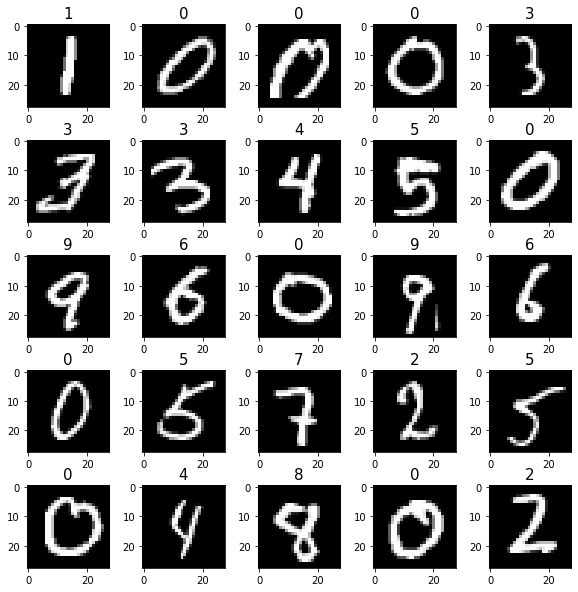

In [3]:
W_grid=5
L_grid=5
fig,axes=plt.subplots(L_grid,W_grid,figsize=(10,10))
n=len(X_train)
axes=axes.ravel()

for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n)
    img=X_train[index]
    axes[i].imshow(img,cmap="gray")
    axes[i].set_title(y_train[index],fontsize=15)
plt.subplots_adjust(hspace=0.4)




##### TEST IMAGES

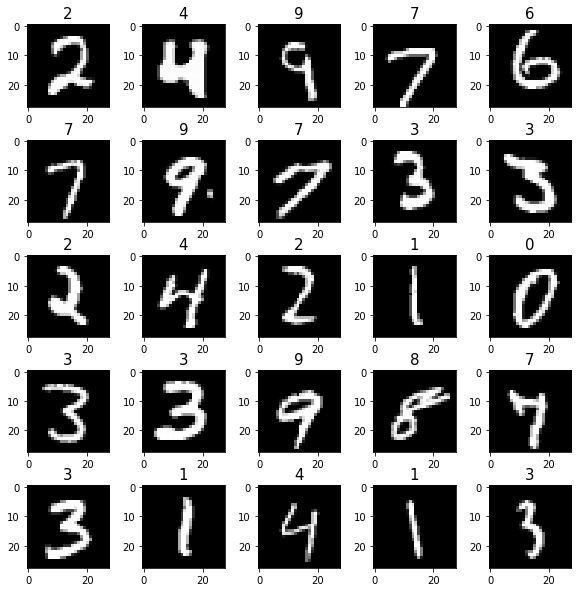

In [4]:
W_grid=5
L_grid=5
fig,axes=plt.subplots(L_grid,W_grid,figsize=(10,10))
n=len(X_test)
axes=axes.ravel()

for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n)
    img=X_test[index]
    axes[i].imshow(img,cmap="gray")
    axes[i].set_title(y_test[index],fontsize=15)
plt.subplots_adjust(hspace=0.4)

        


#### PLOTTING THE LABELS

The labels of the training set are plotted to ensure there is uniform distribution between the different classes

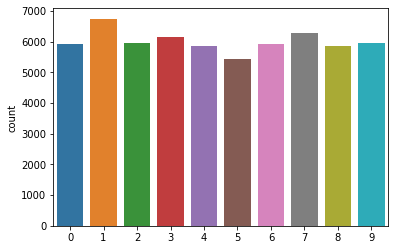

In [5]:
g=sns.countplot(y_train)

We observe that there is around about same number of traning examples for each classes

#### FEATURE SCALING

Print the size of the traning and test sets

In [6]:
print("shape of X_train:{}".format(X_train.shape))
print("shape of y_train:{}".format(y_train.shape))
print("shape of X_test:{}".format(X_test.shape))
print("shape of Y_test:{}".format(y_test.shape))

shape of X_train:(60000, 28, 28)
shape of y_train:(60000,)
shape of X_test:(10000, 28, 28)
shape of Y_test:(10000,)


#### RESHAPING THE IMAGES

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

#### NORMALIZATION

In [8]:
X_train = X_train / 255
X_test = X_test / 255

#### ONE HOT ENCODING

In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#### FIND THE NUMBER OF CLASSES

In [10]:
num_classes = y_test.shape[1]

### VALIDATION SET

Split the trainig set into validation set with test_size=0.1

In [11]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.1,random_state=2)

size of the validation set

In [12]:
print("shape of X_train:{}".format(X_valid.shape))
print("shape of y_train:{}".format(y_valid.shape))

shape of X_train:(6000, 28, 28, 1)
shape of y_train:(6000, 10)


## CNN 

### MODEL DEFINITION

The first is the convolutional (Conv2D) layer. I choosed to set 32 filters for the conv2D layers. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.
Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.
The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.
In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(num_classes,activation="softmax")) the net outputs distribution of probability of each class.

In [13]:
model = Sequential()
model.add(Conv2D(32, (5, 5),kernel_regularizer="l2", bias_regularizer="l2",input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,kernel_regularizer="l2", bias_regularizer="l2",activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

## COMPLIE THE MODEL

In [14]:
optimizer = Adam(lr=0.0001)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## FIT THE MODEL

In [16]:
hist=model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5, batch_size=200)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 29s 546us/step - loss: 2.3825 - accuracy: 0.7715 - val_loss: 1.2513 - val_accuracy: 0.8933
Epoch 2/5
54000/54000 [==============================] - 31s 578us/step - loss: 0.9811 - accuracy: 0.8960 - val_loss: 0.7433 - val_accuracy: 0.9177
Epoch 3/5
54000/54000 [==============================] - 31s 566us/step - loss: 0.6643 - accuracy: 0.9140 - val_loss: 0.5553 - val_accuracy: 0.9288
Epoch 4/5
54000/54000 [==============================] - 31s 575us/step - loss: 0.5235 - accuracy: 0.9259 - val_loss: 0.4601 - val_accuracy: 0.9345
Epoch 5/5
54000/54000 [==============================] - 40s 733us/step - loss: 0.4457 - accuracy: 0.9356 - val_loss: 0.3969 - val_accuracy: 0.9425


In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 5.08%


#### PLOTTING THE VALIDATION ACCURACY AND LOSS

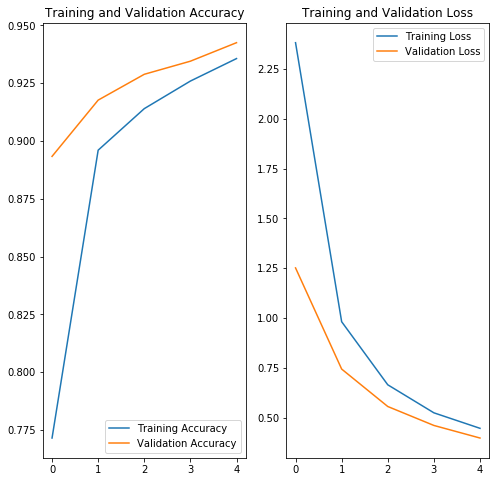

In [18]:
training_accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']

training_loss = hist.history['loss']
validation_loss = hist.history['val_loss']

epochs_range=range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### EVALUATE THE MODEL ON THE TEST SET

In [19]:
loss, accuracy = model.evaluate(X_test,y_test)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))

10000/10000 [==============================] - 1s 115us/step

Loss on the TEST Set: 0.379
Accuracy on the TEST Set: 94.920%


#### DISPLAY A TEST EXAMPLE PREDICTION

Taking a example from the training set  and predicting the number using the model just trained

#### DEFINE A FUNCTION TO CALCULATE THE CLASSES AND PROBABILITIES FOR THE GIVEN EXAMPLE

The function probabilites takes the traning example as its input and return the probabilites for the top 5 highest probabilites and the respective classes

In [64]:
def probabilites(example):
    predss = model.predict(example.reshape(1, 28, 28, 1))
    probss = - np.partition(-preds[0], 5)[:5]
    classess = np.argpartition(-preds[0], 5)[:5]
    return probss,classess


#### DEFINE A FUNCTION TO PLOT THE CLASSES AND PROBABILITIES FOR THE GIVEN EXAMPLE

The plot_predictions probabilites takes the traning example and the return values of the function probabilites as its input and return the plot for the top 5 highest probabilites and the respective classes

In [67]:
def plot_predictions(example,classess,probss):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(example.reshape(28, 28), cmap="gray")
    ax1.axis('off')
    ax2.barh(np.arange(5), probs)
    ax2.set_aspect(0.2)
    ax2.set_yticks(np.arange(5))
    ax2.set_yticklabels(classes)
    ax2.set_title('Class Probabilities')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

#### TESTING FOR A EXAMPLE 

A testing sample is taken and the softmax and hard max predictons are displayed with the image of the example and a plot of the probalities

Prediction (Softmax) from the neural network:

 [[6.8699648e-03 7.1540664e-05 1.6251771e-03 4.8898318e-04 7.1882934e-04
  4.6457225e-03 9.8499399e-01 4.9482496e-06 5.2568107e-04 5.5063141e-05]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


--------- Prediction --------- 




Final Output: 6


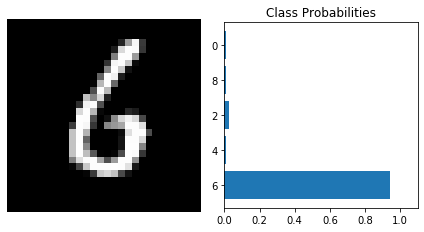

In [68]:
example = X_test[50]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
probabilites(example)
plot_predictions(example,classes,probs)
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

### PLOT THE CONFUSION MATRIX

In [21]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

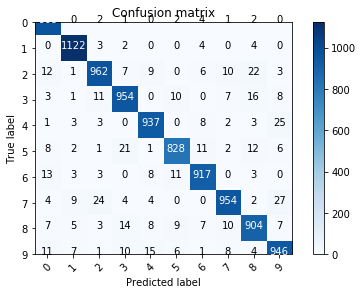

In [22]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred,axis = 1) 

y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes = range(10)) 


In [23]:
model.save("mnist_hand_written_digit_identifier.h10")

C:\Users\HP\Anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '
